In [39]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

from dataloaders.nascar import NascarDataLoader
from dataloaders.bouncing_data import BouncingBallDataLoader
from torch.utils.data import DataLoader
from models.KalmanVAE import KalmanVAE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dl = BouncingBallDataLoader('/data2/users/cb221/bouncing_ball_data_square_black_white_small/train')
train_loader = DataLoader(dl, batch_size=4, shuffle=True, num_workers=4)
obs_dim = next(iter(train_loader))[1].size(-1)
im, y = next(iter(train_loader))
print(im.size())

torch.Size([4, 50, 1, 32, 32])


In [47]:
kvae = KalmanVAE(1,128,2,4,3,1).float()
print(kvae)
vrslds = KalmanVAE(1,128,2,4,3,1).float()
checkpoint = torch.load('/data2/users/cb221/stored_models/KVAE_orig_config_separate_optimizers_beta_5_latest.pth.tar', map_location=torch.device('cpu'))
kvae.load_state_dict(checkpoint['kvae'])

KalmanVAE(
  (encoder): CNNFastEncoder(
    (in_conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (hidden_conv): ModuleList(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (out_mean): Linear(in_features=512, out_features=2, bias=True)
    (out_log_var): Linear(in_features=512, out_features=2, bias=True)
  )
  (decoder): CNNFastDecoder(
    (in_dec): Linear(in_features=2, out_features=512, bias=True)
    (hidden_convs): ModuleList(
      (0): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (out_conv): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (parameter_net): MLP(
    (fc1): Linear(in_features=2, out_features=50, bias=True)
    (fc2): L

<All keys matched successfully>

In [16]:
x_hat, a_mu, _, losses = kvae(im[:,:25].float())
a_mu = a_mu.detach().numpy()

(tensor([[[[  1.0659],
          [ -1.8961],
          [  5.2834],
          [ -3.1159]],

         [[  1.5605],
          [ -4.0726],
          [  8.9202],
          [ -5.1490]],

         [[  1.5863],
          [ -2.3584],
          [  4.1205],
          [ -2.1053]],

         [[ -2.8684],
          [ -2.3271],
          [  5.2084],
          [ -2.4387]]],


        [[[  0.9649],
          [ -3.1627],
          [  1.7087],
          [  0.5446]],

         [[  0.3615],
          [ -6.5691],
          [  3.2633],
          [  0.7389]],

         [[  1.8099],
          [ -3.1197],
          [  1.7783],
          [  0.7675]],

         [[ -4.1004],
          [ -3.9209],
          [  1.4302],
          [ -0.7169]]],


        [[[  1.2866],
          [ -3.3159],
          [  1.7376],
          [  0.2396]],

         [[ -0.2118],
          [ -6.3516],
          [  3.2657],
          [  0.3094]],

         [[  2.1871],
          [ -3.1521],
          [  1.6986],
          [  0.5148]],

     

In [35]:
smoothed_m, smoothed_c = kvae(im[:,:25].float())
print(smoothed_c)

tensor([[[[ 5.2358e-01,  1.3340e-01, -1.3416e-01, -8.4011e-02],
          [ 9.2118e-02,  5.1877e-01, -2.0890e-01, -9.3181e-02],
          [-1.1872e-01, -2.1554e-01,  9.9739e-02,  4.8378e-02],
          [-7.7477e-02, -9.8140e-02,  4.9182e-02,  2.4841e-02]],

         [[ 5.1978e-01,  1.1303e-01, -1.2593e-01, -8.0331e-02],
          [ 8.9982e-02,  5.1701e-01, -2.0790e-01, -9.2645e-02],
          [-1.1731e-01, -2.1161e-01,  9.8040e-02,  4.7586e-02],
          [-7.6682e-02, -9.5414e-02,  4.8035e-02,  2.4314e-02]],

         [[ 5.2451e-01,  1.3223e-01, -1.3387e-01, -8.3939e-02],
          [ 9.1827e-02,  5.1928e-01, -2.0904e-01, -9.3226e-02],
          [-1.1876e-01, -2.1554e-01,  9.9747e-02,  4.8384e-02],
          [-7.7543e-02, -9.8080e-02,  4.9170e-02,  2.4840e-02]],

         [[ 5.1819e-01,  1.1180e-01, -1.2521e-01, -7.9945e-02],
          [ 8.9998e-02,  5.1662e-01, -2.0775e-01, -9.2586e-02],
          [-1.1706e-01, -2.1126e-01,  9.7871e-02,  4.7501e-02],
          [-7.6494e-02, -9.5205e-0

In [33]:
kvae.Q

Parameter containing:
tensor([[ 0.6224,  0.0453,  0.0044,  0.0100],
        [ 0.3245,  0.8925, -0.0263,  0.0759],
        [ 0.2062,  0.4343,  0.6925,  0.0096],
        [ 0.3009,  0.4805,  0.4524,  0.5828]], requires_grad=True)

In [57]:
kvae._kalman_posterior(torch.from_numpy(a_mu), filter_only=True)[0][1][0]

tensor([[[ 1.0117,  0.1347, -0.2132, -0.1429],
         [ 0.2039,  0.9116, -0.3738, -0.1688],
         [-0.2391, -0.3627,  0.1742,  0.0861],
         [-0.1538, -0.1605,  0.0848,  0.0439]],

        [[ 1.0117,  0.1347, -0.2132, -0.1429],
         [ 0.2039,  0.9116, -0.3738, -0.1688],
         [-0.2391, -0.3627,  0.1742,  0.0861],
         [-0.1538, -0.1605,  0.0848,  0.0439]],

        [[ 1.0117,  0.1347, -0.2132, -0.1429],
         [ 0.2039,  0.9116, -0.3738, -0.1688],
         [-0.2391, -0.3627,  0.1742,  0.0861],
         [-0.1538, -0.1605,  0.0848,  0.0439]],

        [[ 1.0117,  0.1347, -0.2132, -0.1429],
         [ 0.2039,  0.9116, -0.3738, -0.1688],
         [-0.2391, -0.3627,  0.1742,  0.0861],
         [-0.1538, -0.1605,  0.0848,  0.0439]]], grad_fn=<SelectBackward>)

In [15]:
for i in range(4):
    plt.scatter(a_mu[i,:,0],a_mu[i,:,1], s=10)

NameError: name 'a_mu' is not defined

(100, 100)
torch.Size([100, 100, 2])


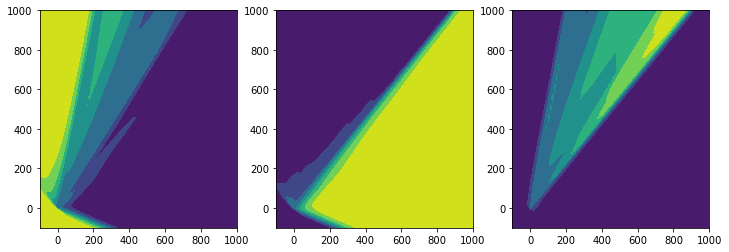

In [52]:
N = 100
xlist = np.linspace(-100, 1000, N)
ylist = np.linspace(-100, 1000, N)
X, Y = np.meshgrid(xlist, ylist)
print(X.shape)
X_t = torch.from_numpy(X).unsqueeze(-1)
Y_t = torch.from_numpy(Y).unsqueeze(-1)
dom = torch.cat([X_t,Y_t], dim=-1).float()
print(dom.size())
Z = kvae.parameter_net(dom.reshape(-1, 2)).softmax(-1).reshape(N,N,-1).detach().numpy()
fig = plt.figure(figsize=(12,4))
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    cp = ax.contourf(X, Y, Z[:,:,i])
plt.show()